# Analysis of hackathon results

Download the form data to this directory, then:

In [1]:
import pandas as pd

fname = "RCDS Hackathon 2025 - Sustainable Coding.xlsx"
data = pd.read_excel(fname)


In [2]:
per_query = 0.00432     # estimated 4.32g CO2 per ChatGPT query.
leaderboard = data.iloc[:,5:]
leaderboard['Total CO2 emissions for LLM usage /kgCO2'] = per_query * leaderboard.iloc[:,1]
leaderboard['Total CO2 emissions /kgCO2'] = leaderboard.iloc[:,2] + \
                                        leaderboard.iloc[:,3] + \
                                        leaderboard.iloc[:,4] + \
                                        leaderboard.iloc[:,6]
                                     
leaderboard = leaderboard.iloc[:,[0,1,6,2,3,4,7,5]] \
                .sort_values('Overall prediction accuracy on the evaluation dataset')
leaderboard

,Team name,Number of LLM interactions during development,Total CO2 emissions for LLM usage /kgCO2,Total tracked CO2 emissions during development,Emissions for training the final model on the full training dataset /kgCO2,Emissions for testing on the evaluation dataset /kgCO2,Total CO2 emissions /kgCO2,Overall prediction accuracy on the evaluation dataset
0,Example,0,0.0,0.001337,0.000062,0.000083,0.001482,0.87


/opt/homebrew/Caskroom/miniconda/base/envs/hack25_2/lib/python3.13/site-packages/matplotlib/text.py:762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(x))
/opt/homebrew/Caskroom/miniconda/base/envs/hack25_2/lib/python3.13/site-packages/matplotlib/text.py:763: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(y))
/opt/homebrew/Caskroom/miniconda/base/envs/hack25_2/lib/python3.13/site-packages/matplotlib/text.py:905: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/opt/homebrew/Caskroom/miniconda/base/envs/hack25_2/lib/python3.13/site-packages/matplotlib/text.py:906: FutureWarning: Calling float on

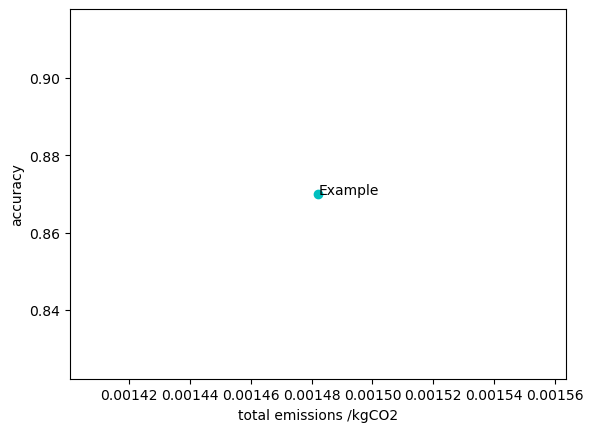

In [4]:
import matplotlib.pyplot as plt
plt.scatter(leaderboard['Total CO2 emissions /kgCO2'], 
                        leaderboard['Overall prediction accuracy on the evaluation dataset'],
                        c='c')
for name in leaderboard['Team name']:
    plt.text(leaderboard['Total CO2 emissions /kgCO2'], 
             leaderboard['Overall prediction accuracy on the evaluation dataset'],
             name)
plt.xlabel('total emissions /kgCO2')
plt.ylabel('accuracy')
plt.show()

---